# **Movie Genre Classification**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb")

100%|██████████| 41.7M/41.7M [00:00<00:00, 48.5MB/s]


In [ ]:

train = pd.read_csv("genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt", sep=':::', header=None,
                       names=("Title","Genre","Description"), index_col=0 ,engine='python')
test = pd.read_csv("genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt", sep=':::', header=None,
                       names=("Title","Description"), index_col=0,engine='python')

test_sol  = pd.read_csv("genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt",  sep=':::', header=None,
                       names=("Title","Genre","Description"), index_col=0,engine='python')

## **Preprocessing**

In [ ]:
print("shape",train.shape)
train.head()

shape (54214, 3)


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
print("shape",test_sol.shape)
test_sol.head()

shape (54200, 3)


,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
print("shape",test.shape)
test.head()

shape (54200, 2)


,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
df = pd.concat((train ,test_sol))
df.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
df.shape

(108414, 3)

In [ ]:
df.duplicated().sum()

df.drop_duplicates(inplace = True)

In [ ]:
df.isna().sum()

df.dropna( inplace = True )

In [ ]:
df.shape

(108414, 4)

In [ ]:
stopword = set(stopwords.words('english'))

def preprocess(text):

    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[#@\$]', '', text)
    tokens = word_tokenize(text)
    lemmatizer  = WordNetLemmatizer()
    text = text.split()
    text = [word for word in text if word not in stopword]
    return " ".join(text)

In [ ]:
df["Despcription_after_preprocessing"] =  df["Description"].apply(preprocess)

In [ ]:
df.head()

,Title,Genre,Description,Despcription_after_preprocessing
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [ ]:
df["Genre"].value_counts()

 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: Genre, dtype: int64

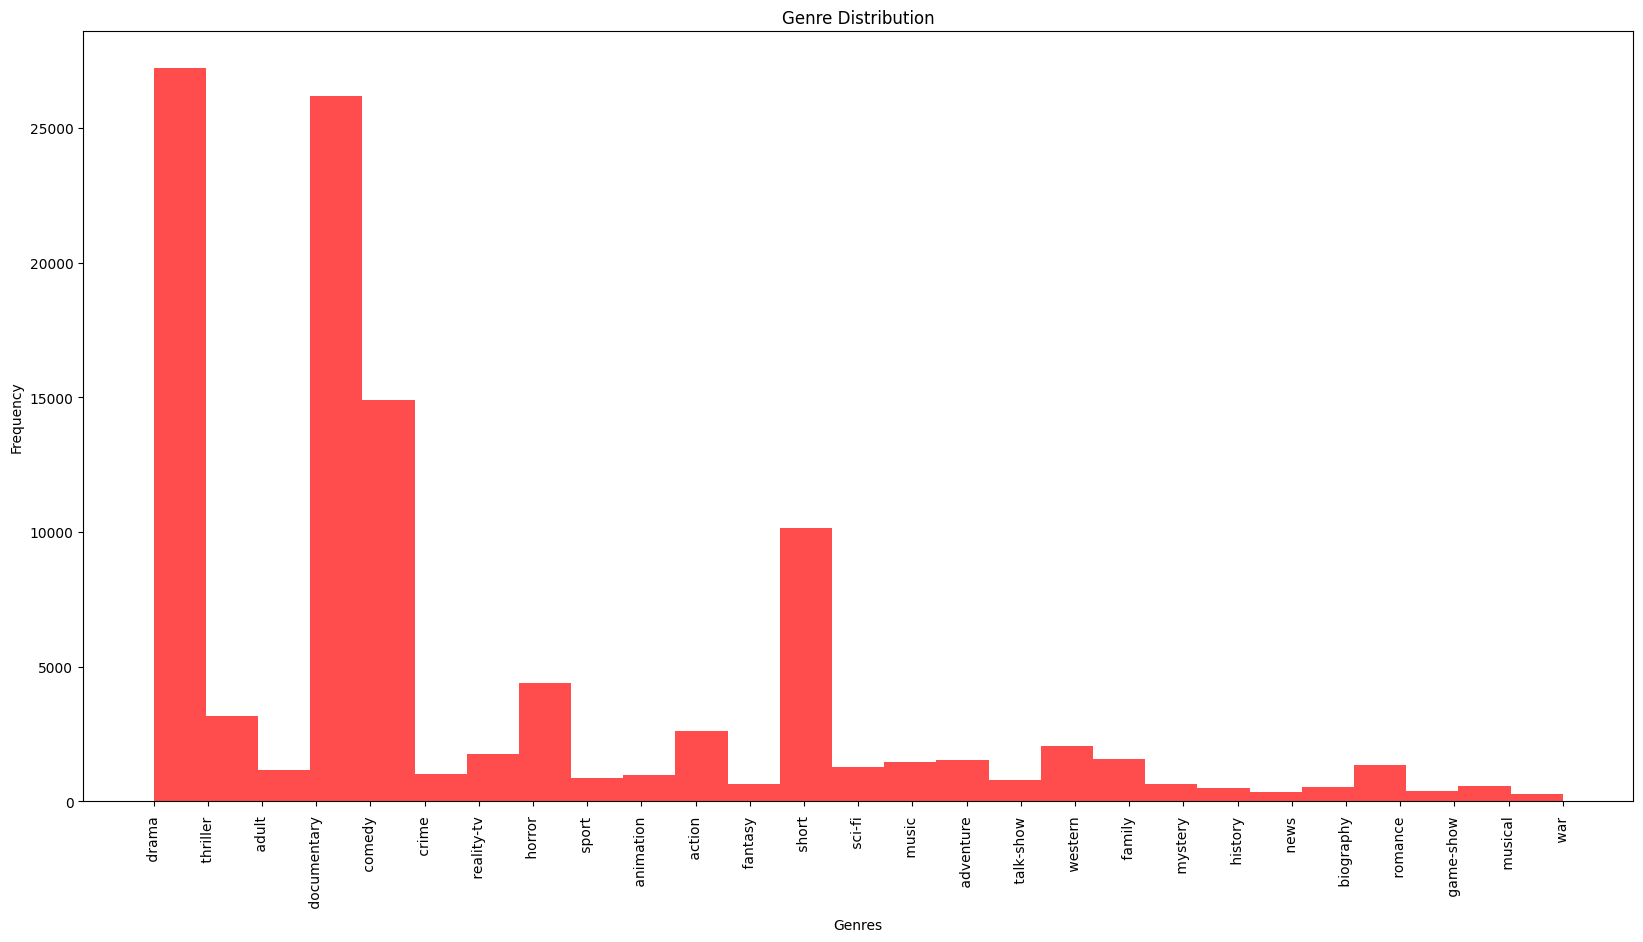

In [ ]:
plt.figure(figsize=(20, 10))
plt.hist(df["Genre"],bins =27 , color='red', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [ ]:
data = df.drop(["Title","Description"] , axis = 1)
data.head()

,Genre,Despcription_after_preprocessing
1,drama,listening conversation doctor parents 10yearol...
2,thriller,brother sister past incestuous relationship cu...
3,adult,bus empties students field trip museum natural...
4,drama,help unemployed father make ends meet edith tw...
5,drama,films title refers unrecovered bodies ground z...


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## **Training Testing**

In [ ]:
x = data["Despcription_after_preprocessing"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.2)

## **TF-IDF Vectorizer**

In [ ]:
vectorizer = TfidfVectorizer()
x_train1 = vectorizer.fit_transform(x_train)
x_test1 =  vectorizer.transform(x_test)

## **Logistic Regression**

In [ ]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train1 ,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_train = lr_classifier.predict(x_train1)
pred_test  = lr_classifier.predict(x_test1)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.699127186357819
Testing  Accuracy :  0.6051745607157681


## **Support Vector Machines**

In [ ]:
svm = LinearSVC()
svm.fit(x_train1 ,y_train)

LinearSVC()

In [ ]:
pred_train = svm.predict(x_train1)
pred_test  = svm.predict(x_test1)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.964245771408147
Testing  Accuracy :  0.6039293455702625


## **Naive Bayes Classifier**

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)

MultinomialNB()

In [ ]:
pred_train = mnb.predict(x_train1)
pred_test  = mnb.predict(x_test1)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.4679295753536798
Testing  Accuracy :  0.4443112115482175
